<a href="https://colab.research.google.com/github/brianferrell787/Time-Series-Analysis-forecasting-with-ARIME-in-google-colab/blob/master/ARIMA_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forescasting

In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ARIMA.csv to ARIMA (1).csv
User uploaded file "ARIMA.csv" with length 1756 bytes


In [ ]:
def parser(x):
    return datetime.strptime(x,'%M-%Y')

sales = pd.read_csv('ARIMA (1).csv',index_col=0, infer_datetime_format=True)

In [ ]:
sales.head()

,Product 10
Month,
Jan-88,8.992
Feb-88,12.003
Mar-88,13.758
Apr-88,12.333
May-88,11.354


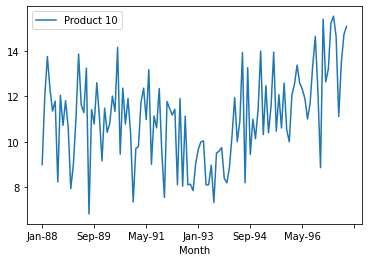

In [ ]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

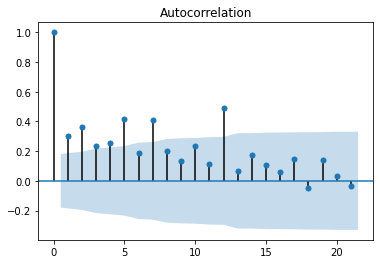

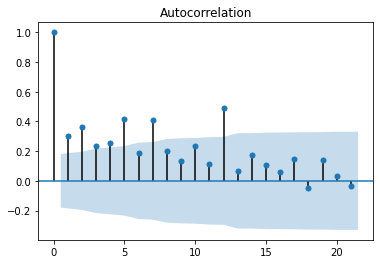

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [ ]:
sales.head()

,Product 10
Month,
Jan-88,8.992
Feb-88,12.003
Mar-88,13.758
Apr-88,12.333
May-88,11.354


In [ ]:
sales.shift(1)

,Product 10
Month,
Jan-88,NaN
Feb-88,8.992
Mar-88,12.003
Apr-88,13.758
May-88,12.333
...,...
Jun-97,15.534
Jul-97,14.637
Aug-97,11.111


In [ ]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [ ]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Product 10
Month,
Feb-88,3.011
Mar-88,1.755
Apr-88,-1.425
May-88,-0.979
Jun-88,0.438


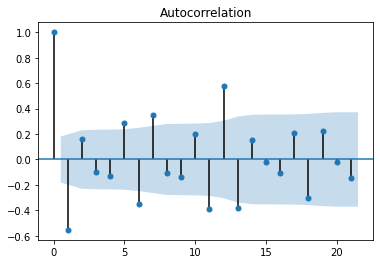

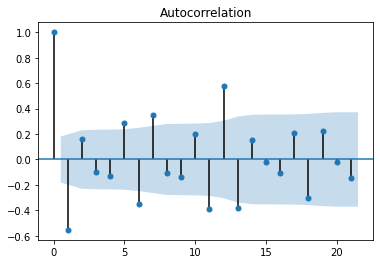

In [ ]:
plot_acf(sales_diff)

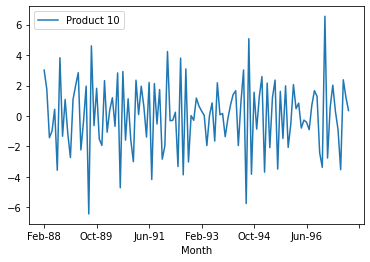

In [ ]:
sales_diff.plot()

In [ ]:
X = sales.values
train = X[0:90] # 99 data as train data
test = X[90:]  # rest of data as test data
predictions = []

In [ ]:
test

array([[10.464],
       [12.078],
       [10.605],
       [12.585],
       [10.526],
       [ 9.998],
       [12.061],
       [12.541],
       [13.381],
       [12.586],
       [12.315],
       [11.903],
       [11.005],
       [11.694],
       [13.355],
       [14.642],
       [12.226],
       [ 8.856],
       [15.404],
       [12.643],
       [13.201],
       [15.225],
       [15.534],
       [14.637],
       [11.111],
       [13.488],
       [14.727],
       [15.084]])

# Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=89,end=118)
print(predictions)

[13.15371381  9.86231413 13.22103958  9.78977792 11.81421723 10.8994448
 10.59287088 13.22079058 10.10489544 12.39006167 10.70923257 10.94179544
 12.83358711 10.02219217 13.00479181 10.04922971 11.768957   11.29315023
 10.35950408 12.72718579 10.09286242 12.1986098  10.8547225  10.79221192
 12.33801794  9.99632849 12.65780243 10.25080478 11.57152975 11.42892021]


In [ ]:
test

array([[10.464],
       [12.078],
       [10.605],
       [12.585],
       [10.526],
       [ 9.998],
       [12.061],
       [12.541],
       [13.381],
       [12.586],
       [12.315],
       [11.903],
       [11.005],
       [11.694],
       [13.355],
       [14.642],
       [12.226],
       [ 8.856],
       [15.404],
       [12.643],
       [13.201],
       [15.225],
       [15.534],
       [14.637],
       [11.111],
       [13.488],
       [14.727],
       [15.084]])

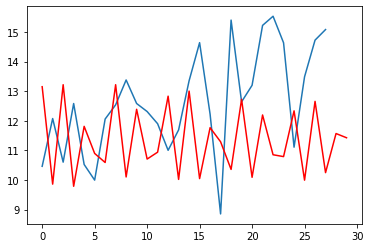

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

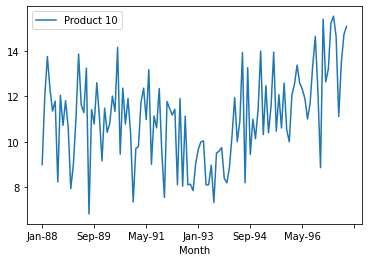

In [ ]:
sales.plot()

# ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(6, 1, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

343.7068279905077


In [ ]:
predictions1= model_arima_fit.forecast(steps=38)[0]
predictions1

array([11.27444225, 13.32303547, 11.07871282, 12.01998577, 12.62053814,
       11.23464578, 13.63491871, 11.17090455, 13.09228859, 12.14049272,
       11.85893768, 13.34329764, 11.16499904, 13.56613903, 11.64638668,
       12.63773038, 12.8596133 , 11.53750074, 13.64994074, 11.35960586,
       13.27961291, 12.27427003, 12.15875163, 13.39558835, 11.41748626,
       13.65678533, 11.78837594, 12.84776399, 12.90843444, 11.80091831,
       13.69785154, 11.55953359, 13.42256826, 12.36135438, 12.39739636,
       13.42754091, 11.65637113, 13.74155689])

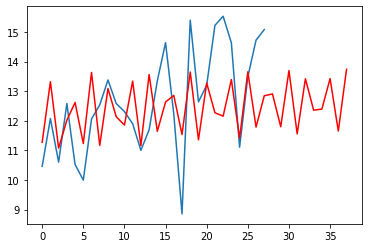

In [ ]:
plt.plot(test)
plt.plot(predictions1,color='red')

In [ ]:
mean_squared_error(test,predictions1[0:28])

2.6347640839578466

In [ ]:
import itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        
    except:
        continue
    

(0, 0, 0) 362.1155718026838
(0, 0, 1) 363.4728579668579
(0, 0, 2) 357.04069718100686
(0, 0, 3) 358.3339100485842
(0, 0, 4) 360.1224138392672
(0, 0, 5) 358.3590404765969
(0, 0, 6) 360.33858906251805
(0, 0, 7) 356.99530474618314
(0, 1, 0) 408.6094541200971
(0, 1, 1) 357.6389400594278
(0, 1, 2) 358.85894919368695
(0, 2, 0) 505.79798022985915
(0, 2, 1) 411.5264086199002
(1, 0, 0) 363.11619748113907
(1, 0, 1) 359.3199237748853
(1, 0, 2) 358.3907119545137
(1, 1, 0) 372.34498994262157
(1, 1, 1) 358.6362465200255
(1, 1, 2) 359.90925600874607
(1, 1, 3) 359.2147374674257
(1, 1, 4) 362.7097648648141
(1, 1, 5) 357.0564746730356
(1, 1, 6) 359.0377554444081
(1, 1, 7) 358.21522191245816
(1, 2, 0) 431.468755430501
(1, 2, 1) 376.5374057331875
(2, 0, 0) 358.3476222730365
(2, 0, 1) 360.22979166926206
(2, 0, 2) 359.8784550504711
(2, 1, 0) 370.9315218912335
(2, 1, 1) 359.32596707625305
(2, 1, 2) 361.10743027494493
(2, 1, 3) 348.6304884939623
(2, 1, 4) 348.2895590410019
(2, 1, 5) 345.0351249229575
(2, 1, 6)